In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/personnel_data.csv' )
df.tail(3)

,EmployeeID,Age,Experience,EducationLevel,Salary,JobSatisfaction,Department,ProjectsHandled,PromotionLast5Years
497,498,34,2,2,33.01,5,3,5,0
498,499,30,23,2,52.72,7,5,20,0
499,500,48,22,1,36.94,4,2,15,0


In [ ]:
# Use Annual Income & Spending Score

reduced_df = df.drop(df.iloc[:,[0,3]], axis = 1)
reduced_df.tail(3)

,Age,Experience,Salary,JobSatisfaction,Department,ProjectsHandled,PromotionLast5Years
497,34,2,33.01,5,3,5,0
498,30,23,52.72,7,5,20,0
499,48,22,36.94,4,2,15,0


In [ ]:
df.isnull().sum()

,0
EmployeeID,0
Age,0
Experience,0
EducationLevel,0
Salary,0
JobSatisfaction,0
Department,0
ProjectsHandled,0
PromotionLast5Years,0


Scalar Value

In [ ]:
from sklearn.preprocessing import StandardScaler


cleaned_data = df.drop(['EmployeeID', 'EducationLevel'],axis = 1)
cleaned_data

,Age,Experience,Salary,JobSatisfaction,Department,ProjectsHandled,PromotionLast5Years
0,50,1,33.07,3,5,10,0
1,36,4,19.37,7,1,11,0
2,29,28,52.64,8,1,5,1
3,42,18,60.37,10,4,8,0
4,40,7,28.94,6,3,15,0
...,...,...,...,...,...,...,...
495,59,7,35.53,2,1,0,0
496,28,0,31.77,8,1,5,0
497,34,2,33.01,5,3,5,0
498,30,23,52.72,7,5,20,0


## Please normalize the cleaned data from Number 1 using a StandardScaler()
# 2. What is now the scaled value for Salary of data 125?

In [ ]:
df['Salary_scaled'] = scaler.fit_transform(df[['Salary']])
print(df.loc[125, 'Salary_scaled'])

1.067410601231861


## 3. What is now the scaled value for Experience of data 130?
          

In [ ]:
df['Experience_scaled'] = scaler.fit_transform(df[['Experience']])
print(df.loc[130, 'Experience_scaled'])

1.1012963108807026




If we set a threshold of greater than 0.66 (absolute), which do you think (variable) will be eliminated? To set uniformity in elimination, eliminate the variable/s first based on alphabetical order. (Eg. If Assignments and Grades is highly correlated, eliminate Assignments)
Remove from the scaled dataset the highly correlated variable/s

In [ ]:
cleaned_df = cleaned_data.drop(['Experience'], axis = 1)
cleaned_df

,Age,Salary,JobSatisfaction,Department,ProjectsHandled,PromotionLast5Years
0,50,33.07,3,5,10,0
1,36,19.37,7,1,11,0
2,29,52.64,8,1,5,1
3,42,60.37,10,4,8,0
4,40,28.94,6,3,15,0
...,...,...,...,...,...,...
495,59,35.53,2,1,0,0
496,28,31.77,8,1,5,0
497,34,33.01,5,3,5,0
498,30,52.72,7,5,20,0


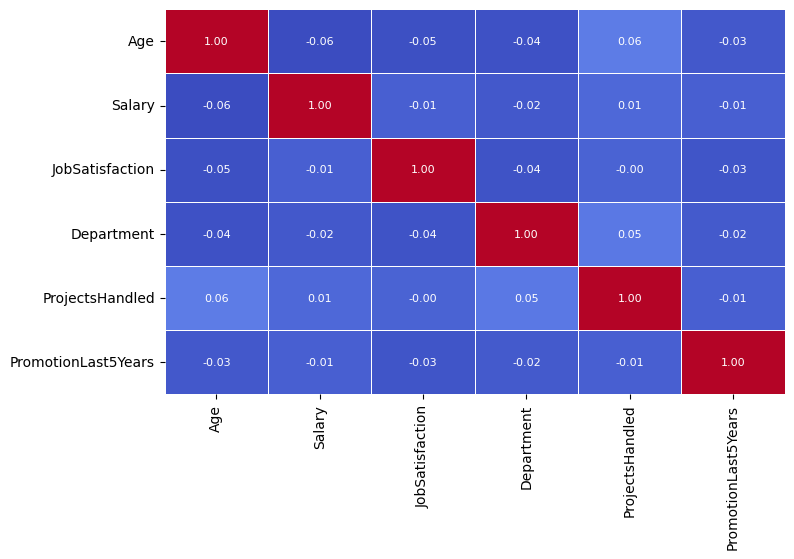

In [ ]:
correlation_matrix = cleaned_df.corr()

plt.figure(figsize = (8,5))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, fmt = '.2f', annot_kws={"size": 8}, cbar = False)
plt.show()

# 5. Based on Elbow Graph or S-Scores Visualizer, what is the optimal number of clusters?

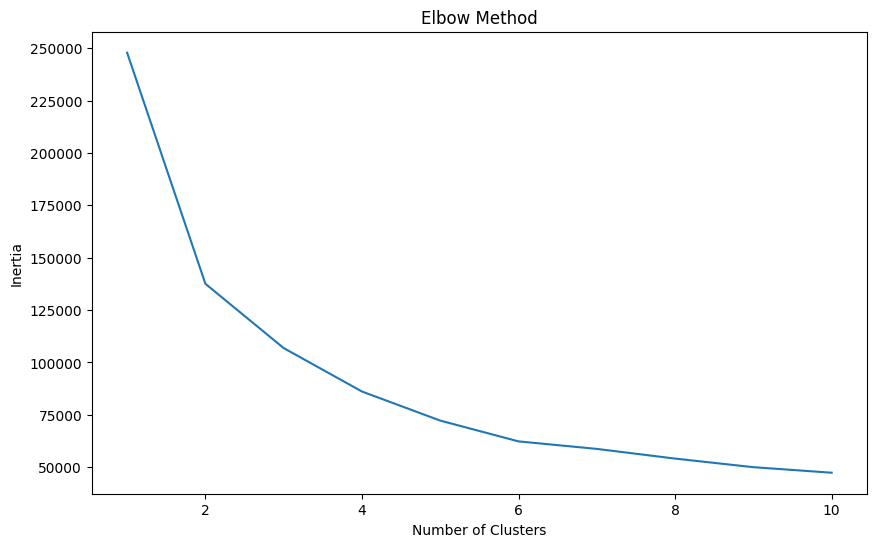

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  model = KMeans(n_clusters = i, random_state= 101, n_init = 'auto')
  model.fit(cleaned_df)
  wcss.append(model.inertia_)

plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

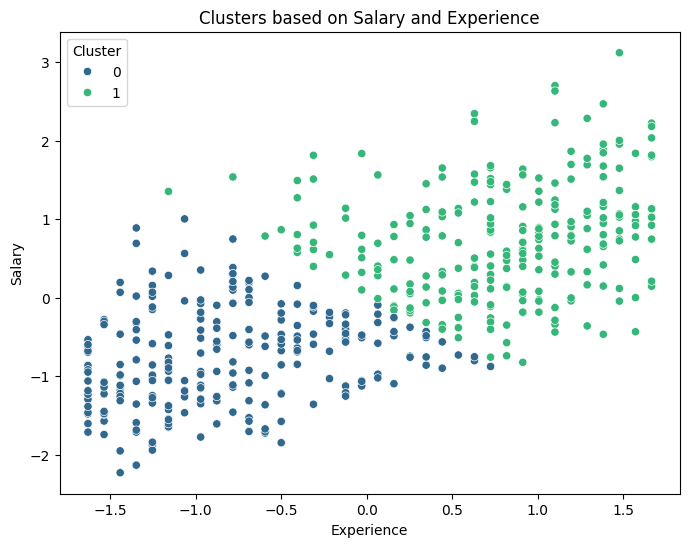

Cluster
0   -0.752618
1    0.734770
Name: Salary_scaled, dtype: float64


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=2, random_state=101)
df['Cluster'] = kmeans.fit_predict(df[['Experience_scaled', 'Salary_scaled']])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Experience_scaled', y='Salary_scaled', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters based on Salary and Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

cluster_means = df.groupby('Cluster')['Salary_scaled'].mean()
print(cluster_means)

Cluster
0    41.437247
1    41.209486
Name: Age, dtype: float64


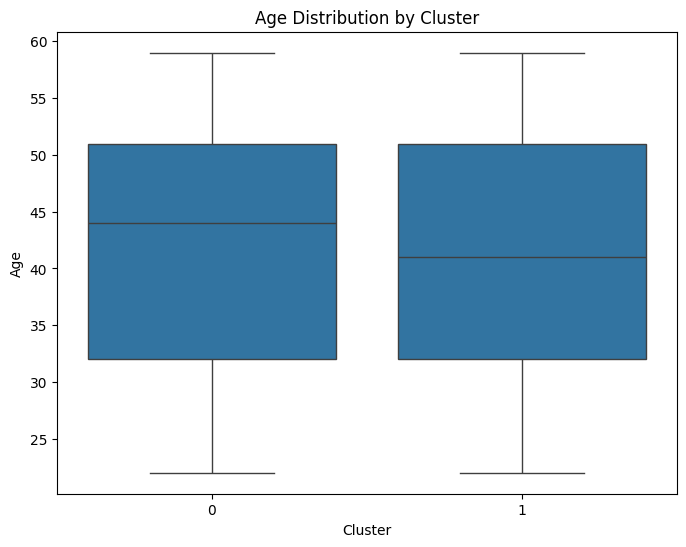

In [ ]:
cluster_means_age = df.groupby('Cluster')['Age'].mean()
print(cluster_means_age)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()


Data 305 belongs to Cluster 0


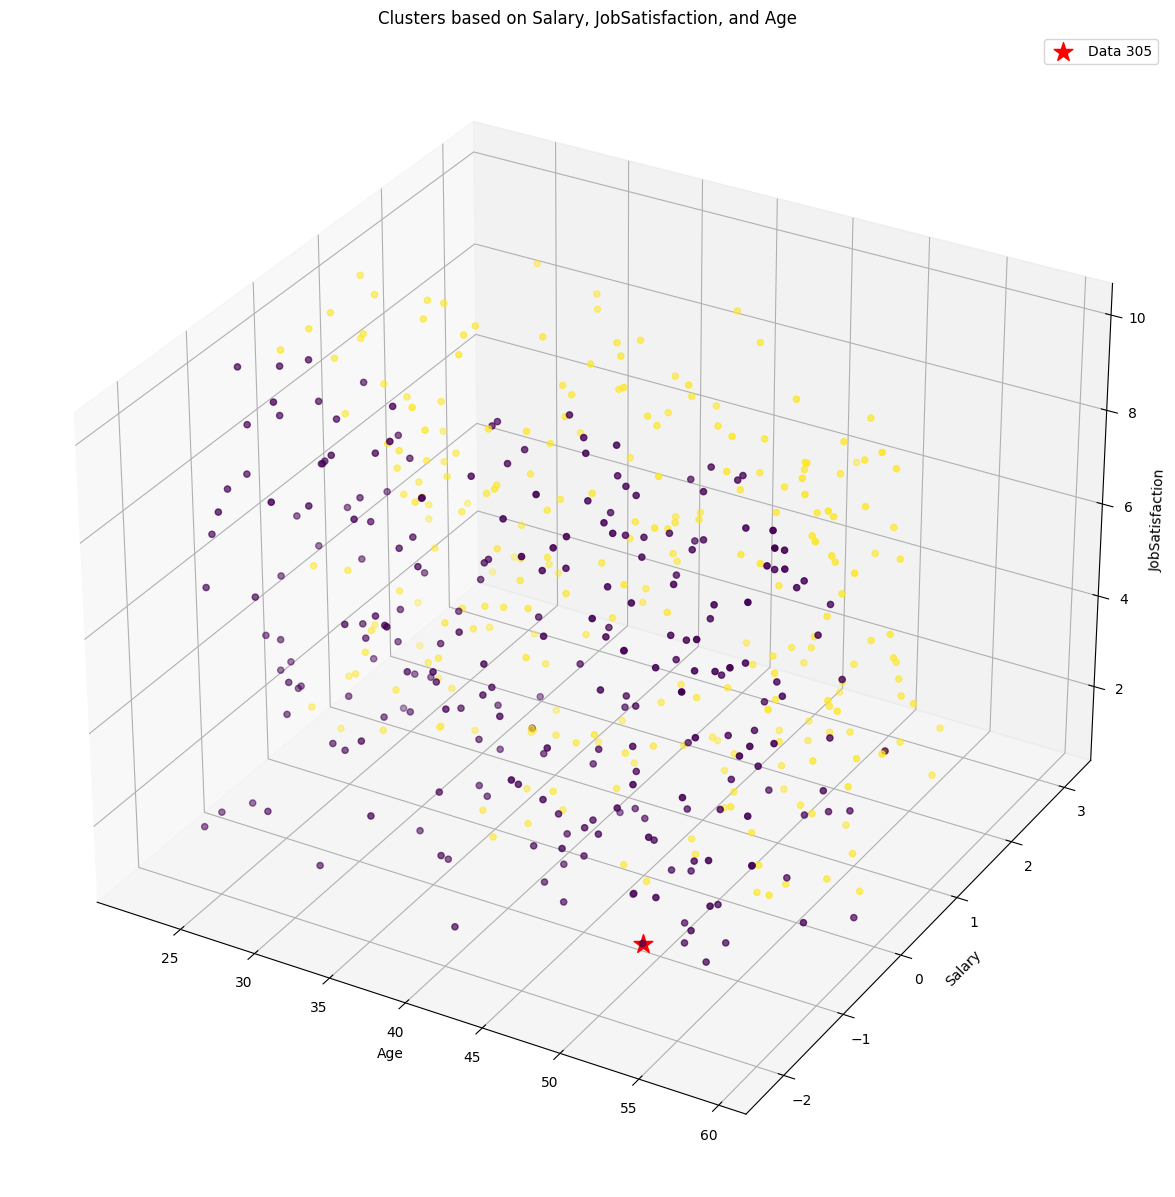

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='Experience_scaled', y='Salary_scaled', z='Age',
                    color='Cluster', title='Clusters based on Salary, Experience, and Age')

fig.show()
cluster_305 = df.loc[305, 'Cluster']
print(f"Data 305 belongs to Cluster {cluster_305}")

fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['Salary_scaled'], df['JobSatisfaction'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Salary')
ax.set_zlabel('JobSatisfaction')
plt.title('Clusters based on Salary, JobSatisfaction, and Age')

ax.scatter(df.loc[305, 'Age'], df.loc[305, 'Salary_scaled'], df.loc[305, 'JobSatisfaction'], marker='*', s=200, c='red', label='Data 305')
ax.legend()

plt.show()

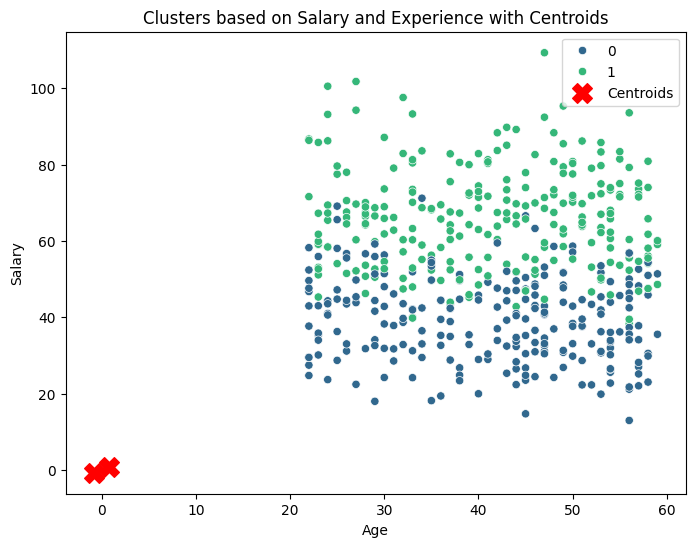

[[-0.82782697 -0.75261844]
 [ 0.80819471  0.73476978]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your kmeans object defined as 'kmeans'
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', hue='Cluster', data= df, palette='viridis')
plt.title('Clusters based on Salary and Experience with Centroids')
plt.xlabel('Age')
plt.ylabel('Salary')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.legend()
plt.show()

print(centroids)